<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Medium_blogs_code/blob/master/1_corona_visualization/Visualization_coronavirus_germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import lxml.html as lh
import pandas as pd

In [ ]:
url='https://www.coronavirus.jetzt/karten/deutschland/'
page = requests.get(url)
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [ ]:
tr_elements = doc.xpath('//tr')
col=[]
#For each row of 16 states, store the name of state, the numbers of infected and deaths
for n in range(1,len(tr_elements)):
  row =[]
  for t in tr_elements[n]:
      name=t.text_content()
      row.append((name))
  col.append(row)
col= np.array(col)
df = pd.DataFrame({'Bundesland': col[:,0], 'Infizierte': col[:,1], 'Todesfälle':col[:,2]})
df

[['Baden-Württemberg', '47217', '1924'], ['Bayern', '64045', '2691'], ['Berlin', '12732', '227'], ['Brandenburg', '4086', '178'], ['Bremen', '2182', '58'], ['Hamburg', '7009', '268'], ['Hessen', '17368', '550'], ['Mecklenburg-Vorpommern', '1164', '21'], ['Niedersachsen', '18717', '685'], ['Nordrhein-Westfalen', '63941', '1852'], ['Rheinland-Pfalz', '10183', '255'], ['Saarland', '3306', '179'], ['Sachsen', '6594', '229'], ['Sachsen-Anhalt', '2405', '66'], ['Schleswig-Holstein', '4372', '164'], ['Thüringen', '3893', '194']]


,Bundesland,Infizierte,Todesfälle
0,Baden-Württemberg,47217,1924
1,Bayern,64045,2691
2,Berlin,12732,227
3,Brandenburg,4086,178
4,Bremen,2182,58
5,Hamburg,7009,268
6,Hessen,17368,550
7,Mecklenburg-Vorpommern,1164,21
8,Niedersachsen,18717,685
9,Nordrhein-Westfalen,63941,1852


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!mkdir -p geomap
!unzip /content/gdrive/My\ Drive/Colab\ Notebooks/blogs_medium/vg2500_geo84.zip -d geomap/ 

Archive:  /content/gdrive/My Drive/Colab Notebooks/blogs_medium/vg2500_geo84.zip
 extracting: geomap/aktualitaet.txt  
  inflating: geomap/vg2500_bld.dbf   
  inflating: geomap/vg2500_bld.prj   
  inflating: geomap/vg2500_bld.shp   
  inflating: geomap/vg2500_bld.shx   
  inflating: geomap/vg2500_krs.dbf   
  inflating: geomap/vg2500_krs.prj   
  inflating: geomap/vg2500_krs.shp   
  inflating: geomap/vg2500_krs.shx   
  inflating: geomap/vg2500_rbz.dbf   
  inflating: geomap/vg2500_rbz.prj   
  inflating: geomap/vg2500_rbz.shp   
  inflating: geomap/vg2500_rbz.shx   
  inflating: geomap/vg2500_sta.dbf   
  inflating: geomap/vg2500_sta.prj   
  inflating: geomap/vg2500_sta.shp   
  inflating: geomap/vg2500_sta.shx   


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 298kB/s 
     |████████████████████████████████| 10.9MB 38.1MB/s 


In [ ]:
fp = "geomap/vg2500_bld.shp"
map_df = gpd.read_file(fp)
map_df.head()
map_df.plot()

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."


In [ ]:
merged = map_df.set_index('GEN').join(df.set_index('Bundesland'))
merged

,USE,RS,RS_ALT,SHAPE_LENG,SHAPE_AREA,geometry,Infizierte,Todesfälle
GEN,,,,,,,,
Hamburg,2,02,020000000000,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",7009,268
Niedersachsen,2,03,030000000000,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...",18717,685
Bremen,2,04,040000000000,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...",2182,58
Nordrhein-Westfalen,2,05,050000000000,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...",63941,1852
Hessen,2,06,060000000000,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...",17368,550
Rheinland-Pfalz,2,07,070000000000,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ...",10183,255
Baden-Württemberg,2,08,080000000000,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7...",47217,1924
Bayern,2,09,090000000000,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081...",64045,2691
Saarland,2,10,100000000000,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ...",3306,179


In [ ]:
column = df['Infizierte']
max_Infizierte = column.max()
column = df['Todesfälle']
max_Todesfälle = column.max()

In [ ]:
map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]

([], <a list of 0 Text major ticklabel objects>)

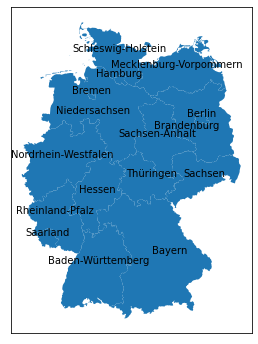

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))
map_df.plot(ax=ax)
for idx, row in map_df.iterrows():
  if idx ==10:
    plt.annotate(s=row['GEN'], xy=row['coords'],verticalalignment='top',
                 horizontalalignment='right')
    continue
  plt.annotate(s=row['GEN'], xy=row['coords'],verticalalignment='bottom',\
                 horizontalalignment='center')
plt.xticks(np.array([]))
plt.yticks(np.array([]))

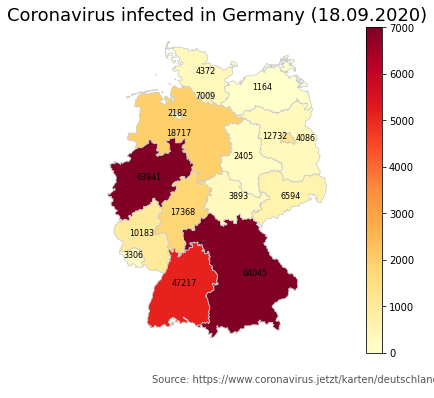

In [ ]:
column = df['Infizierte']
max_Infizierte = column.max()
column = df['Todesfälle']
max_Todesfälle = column.max()
vmin, vmax = 0, max_Infizierte
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='Infizierte', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
for idx, row in merged.iterrows():
    if idx =='Berlin':
      plt.annotate(s=row['Infizierte'], xy=row['coords'],
                 horizontalalignment='right',fontsize=8)
      continue
    plt.annotate(s=row['Infizierte'], xy=row['coords'],
                 horizontalalignment='center',fontsize=8)
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Coronavirus infected in Germany (18.09.2020)', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})
ax.annotate('Source: https://www.coronavirus.jetzt/karten/deutschland/',
          xy=(0.35, .06), xycoords='figure fraction',
          horizontalalignment='left', verticalalignment='top',
          fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('testmap_1.png', dpi=300)

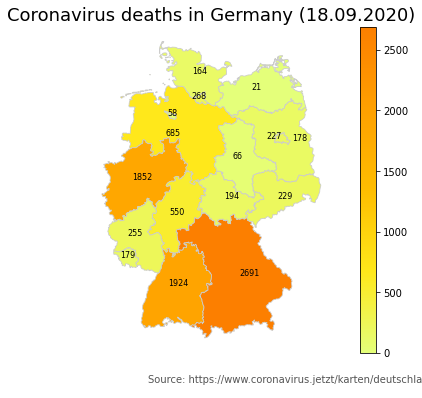

In [ ]:
vmin, vmax = 0, max_Todesfälle

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='Todesfälle', cmap='Wistia', linewidth=0.8, ax=ax, edgecolor='0.8')
for idx, row in merged.iterrows():
    if idx =='Berlin':
      plt.annotate(s=row['Todesfälle'], xy=row['coords'],
                 horizontalalignment='right',fontsize=8)
      continue
    plt.annotate(s=row['Todesfälle'], xy=row['coords'],
                 horizontalalignment='center',fontsize=8)
ax.axis('off')
ax.set_title('Coronavirus deaths in Germany (18.09.2020)', \
              fontdict={'fontsize': '18',
                        'fontweight' : '3'})
ax.annotate('Source: https://www.coronavirus.jetzt/karten/deutschland/',
          xy=(0.35, .06), xycoords='figure fraction',
          horizontalalignment='left', verticalalignment='top',
          fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('testmap_2.png', dpi=300)